## SVM --> Support Vector Machine

#### Generate Dataset

In [1]:
from sklearn.datasets import make_classification

ModuleNotFoundError: No module named 'sklearn'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
X,Y = make_classification(n_classes=2,n_samples=400,n_features=2,n_informative=2,n_clusters_per_class=1,n_redundant=0,random_state=3)

In [17]:
# Convert label into 1 and -1
Y[Y == 0] = -1  # Broadcasting

In [18]:
# Y

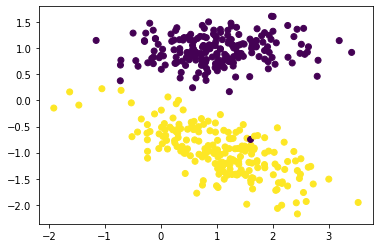

In [19]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [42]:
class SVM:

    def __init__(self,C=1.0):
        self.C= C
        self.W = 0
        self.b = 0

    def hingeLoss(self,W,b,X,Y):
        loss = 0.0

        loss += 0.5*np.dot(W,W.T)

        m = X.shape[0]

        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C * max(0,(1-ti))

        return loss[0,0]

    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxiter=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]

        n =learning_rate
        c = self.C

        #Init the model parameter
        W =np.zeros((1,no_of_features))
        bias = 0

        print(self.hingeLoss(W,bias,X,Y))

        # Training from here...
        # Wieght and biased update rule -->
        loss_list = []

        for i in range(maxiter):
            # training loop
            l = self.hingeLoss(W,bias,X,Y)
            loss_list.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)

            #Batch Gradient Descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                # Assume 0 gradient for the batch
                gradw = 0
                gradb = 0

                #Iterate over all examples in the mini-batch
                for j in range(batch_start,batch_start+batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)

                        if ti >=1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                # gradient for the Batch is ready

                W = W -n*W + n*gradw
                bias = bias + n*gradb

        self.W = W
        self.b = bias
        return W[0],bias,loss_list


In [43]:
mySVM =SVM()

In [44]:
W,b,loss_list = mySVM.fit(X,Y,maxiter=40)

400.0


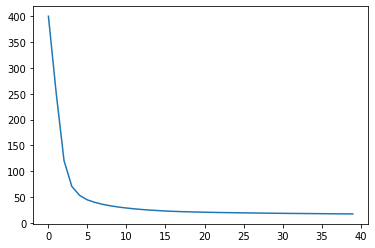

In [45]:
plt.plot(loss_list)
plt.show()

In [46]:
loss_list[0]

400.0

In [47]:
loss_list[-1]

17.25206307624491

In [56]:
def plotHyperplane(W,bias):
    plt.scatter(X[:,0],X[:,1],c=Y)
    x1 = np.linspace(-2,4,10)
    x2 = -(W[0]*x1+bias)/W[1]
    xp = -(W[0]*x1+bias+1)/W[1]  # WX + B = -1
    xn = -(W[0]*x1+bias-1)/W[1]  # WX + B = +1
    plt.plot(x1,xp,marker='+',label="Positive Hyperplane")
    plt.plot(x1,x2,label="Hyperplane")
    plt.plot(x1,xn,marker='-',label="Negative Hyperplane")
    plt.legend()
    plt.show()

ValueError: Unrecognized marker style '-'

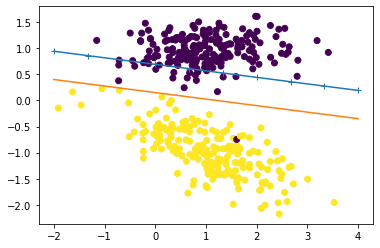

In [57]:
plotHyperplane(W,b)

In [50]:
W

array([-0.2311832 , -1.84931703])

##### Visualizing Support vector, positive nad negative hyperplane

In [ ]:
# Effect of 'C' Penalty

In [52]:
def Hyper(W,bias):
    plt.scatter(X[:,0],X[:,1],c=Y)
    x1 = np.linspace(-2,4,10)
    x2 = (1 - (W[0]*x1) + bias)/W[1]
    plt.plot(x1,x2,color="red",label="Positive")
    plt.legend()
    plt.show()

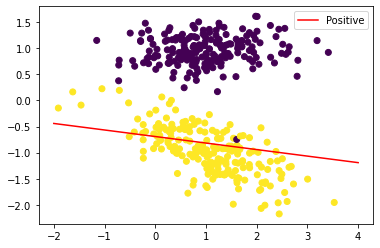

In [53]:
Hyper(W,b)

#### To find the optimal value of c we use grid search